In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

df = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/Data_set/PROYECTO_PREDICCION_VENTAS/EDA_PREDICCION_VENTAS')
df.head()

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Mes,RANGO
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11,30
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02,20
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01,60
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05,30
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05,60


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              998 non-null    datetime64[ns]
 1   Customer ID       998 non-null    object        
 2   Gender            998 non-null    object        
 3   Age               998 non-null    int64         
 4   Product Category  998 non-null    object        
 5   Quantity          998 non-null    int64         
 6   Price per Unit    998 non-null    int64         
 7   Total Amount      998 non-null    int64         
 8   Mes               998 non-null    object        
 9   RANGO             998 non-null    int64         
 10  Day               998 non-null    int32         
 11  Month             998 non-null    int32         
dtypes: datetime64[ns](1), int32(2), int64(5), object(4)
memory usage: 85.9+ KB


In [5]:
df['Gender'].value_counts()

,count
Gender,
Female,510
Male,488


In [17]:
from itertools import starmap
# Dividir target y eliminar columnas irrelevantes
X = df.drop(['Gender', 'Date','Mes','Customer ID'], axis=1)  # Eliminamos Date, pero mantenemos las nuevas columnas derivadas
y = df['Gender']
#TRABAJAR MI TARGET
impu_y = SimpleImputer(strategy='most_frequent')
y_imputed = impu_y.fit_transform(np.array(y).reshape(-1, 1))  # Asegurarse de que y tenga la forma correcta

# Usar LabelEncoder para codificar las etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_imputed.ravel())

# Definir listas de columnas (revisando 'RANGO' si es categórica)
numeral = ['Age', 'Quantity', 'Price per Unit', 'Day','Month','RANGO','Total Amount']  # Agrega las nuevas columnas de fecha si son útiles
nominal = ['Product Category']

# Imputación
impu_num = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scalar', StandardScaler())
])

impu_nom = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one', OneHotEncoder())
])

# Transformación de las columnas
preproceso = ColumnTransformer(
    transformers=[
        ('num', impu_num, numeral),
        ('nom', impu_nom, nominal),
    ],
    remainder='passthrough',
    n_jobs=-1,
    verbose=True,
    sparse_threshold=0.3
)
preproceso

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scalar', StandardScaler())]),
                                 ['Age', 'Quantity', 'Price per Unit', 'Day',
                                  'Month', 'RANGO', 'Total Amount']),
                                ('nom',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one', OneHotEncoder())]),
                                 ['Product Category'])],
                  verbose=True)

In [9]:
#DIVISION DEL CONJUNTO DE DATOS
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [11]:
!pip install lazypredict

In [12]:
from lazypredict.Supervised import LazyClassifier
lazy = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy.fit(X_train, X_test, y_train, y_test)
m = pd.DataFrame(models)
m.head(5)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
 97%|█████████▋| 28/29 [00:05<00:00,  3.68it/s]

[LightGBM] [Info] Number of positive: 343, number of negative: 355
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 698, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491404 -> initscore=-0.034387
[LightGBM] [Info] Start training from score -0.034387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████| 29/29 [00:05<00:00,  5.33it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CalibratedClassifierCV,0.55,0.53,0.53,0.47,0.08
PassiveAggressiveClassifier,0.54,0.53,0.53,0.50,0.16
ExtraTreesClassifier,0.52,0.52,0.52,0.52,0.48
Perceptron,0.51,0.51,0.51,0.50,0.11
RandomForestClassifier,0.51,0.51,0.51,0.51,0.74


**BUSCAR HIPERPARAMETROS**

In [13]:
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

#BUSCAR HIPERPARAMETROS
modelos = {
    'Decision Tree': {
        'modelo': DecisionTreeClassifier(),
        'params': {
            'modelo__max_depth': [None, 10, 20, 30],
            'modelo__min_samples_split': range(2, 21),
            'modelo__min_samples_leaf': range(1, 11)
        }
    },
    'RandomForestClassifier': {
        'modelo': RandomForestClassifier(),
        'params': {
            'modelo__n_estimators': [50, 100, 200],
            'modelo__max_depth': [None, 10, 20],
            'modelo__min_samples_split': [2, 5, 10],
            'modelo__min_samples_leaf': [1, 2, 4]
        }
    },
    'BaggingClassifier': {
        'modelo': BaggingClassifier(),
        'params': {
            'modelo__n_estimators': [10, 50, 100],
            'modelo__max_samples': [0.5, 0.7, 1.0],
            'modelo__max_features': [0.5, 0.7, 1.0]
        }
    }
}

In [16]:
resultados = {}
#PRE
for modelo_nombre, config in modelos.items():
  model = Pipeline(steps=[
      ('pre', preproceso),
      ('modelo', config['modelo'])
  ])
  #VAALIDACION CRUZADA
  grid = GridSearchCV(model, config['params'], cv=5, n_jobs=-1)
  grid.fit(X_train, y_train)

  #MEJORES PARAMETROS
  mejores_parametros = grid.best_params_
  mejor_modelo = grid.best_estimator_

  #EVALUAR LOS MODELOS EN EL CONJUNTO DE PRUEBA
  y_pred = mejor_modelo.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  #encerrar resultados
  resultados[modelo_nombre] = {
      'mejor_parametro': mejores_parametros,
      'mejor_modelo' : mejor_modelo,
      'accuracy' : accuracy
  }
#MOSTRAR RESULTADOS
m_op = pd.DataFrame(resultados)
m_op.head()

ValueError: 
All the 3800 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
760 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 959, in fit
    super()._fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 242, in _fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 617, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Electronics'

--------------------------------------------------------------------------------
3040 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 959, in fit
    super()._fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 242, in _fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 617, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Beauty'


**OPTIMIZACION DEL MODELOS**

In [ ]:
tre = resultados['Decision Tree']
tre = tre['mejor_parametro']
ran = resultados['RandomForestClassifier']
ran = ran['mejor_parametro']
bag = resultados['BaggingClassifier']
bag = bag['mejor_parametro']

print('bag', bag)
print('\nran', ran)
print('\ntre', tre)

bag {'modelo__max_features': 0.7, 'modelo__max_samples': 1.0, 'modelo__n_estimators': 50}

ran {'modelo__max_depth': 20, 'modelo__min_samples_leaf': 1, 'modelo__min_samples_split': 2, 'modelo__n_estimators': 50}

tre {'modelo__max_depth': None, 'modelo__min_samples_leaf': 4, 'modelo__min_samples_split': 14}


In [ ]:
#BAGGING
bagging = Pipeline(steps=[
    ('pre', preproceso),
    ('modelo', BaggingClassifier(max_features=bag['modelo__max_features'],
                                max_samples=bag['modelo__max_samples'],
                                n_estimators=bag['modelo__n_estimators']))
])


#RANDOM
random = Pipeline(steps=[
    ('pre', preproceso),
    ('modelo', RandomForestClassifier(max_depth=ran['modelo__max_depth'],
                                      min_samples_leaf=ran['modelo__min_samples_leaf'],
                                      min_samples_split=ran['modelo__min_samples_split'],
                                      n_estimators=ran['modelo__n_estimators'],
                                      random_state=28))
])


#ARBOL
arbol = Pipeline(steps=[
    ('pre', preproceso),
    ('modelo', DecisionTreeClassifier(max_depth=tre['modelo__max_depth'],
                                      min_samples_leaf=tre['modelo__min_samples_leaf'],
                                      min_samples_split=tre['modelo__min_samples_split'],
                                      random_state=28))
])


In [ ]:
#ENTRENAMIENTOS
bagging.fit(X_train, y_train)
random.fit(X_train, y_train)
arbol.fit(X_train, y_train)
#PREDICCIONES
bagging_pred = bagging.predict(X_test)
random_pred = random.predict(X_test)
arbol_pred = arbol.predict(X_test)

# **BENCHMARKING**

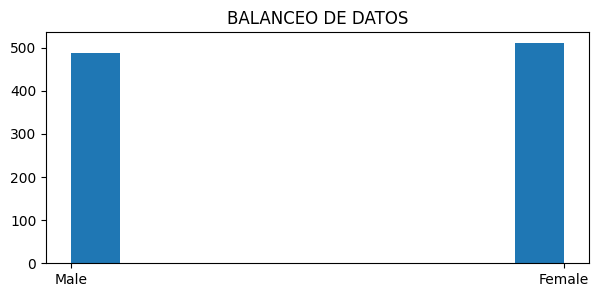


No estan balanceados al 100% pero si estan en un rango aceptable para categorizarlo BALANCEADO


In [ ]:
fig = plt.figure(dpi=100, figsize=(7,3))
plt.hist(df['Gender'])
plt.title('BALANCEO DE DATOS')
plt.show()
print('\nNo estan balanceados al 100% pero si estan en un rango aceptable para categorizarlo BALANCEADO')

BAGGING

---



METRICAS DEL MODELO BAGGING
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.56      0.57      0.56       155
           1       0.53      0.52      0.52       145

    accuracy                           0.54       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.54      0.54      0.54       300



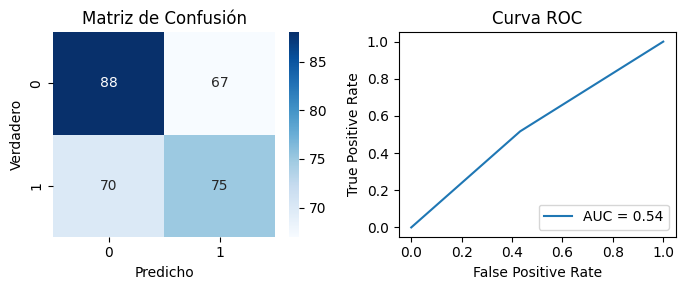


PRECISION: 53% = mujeres, 50%=varones. Tengo una mejor precision al predecir mujeres que hombres
RECALL: mujer = 59%, varon=46%. El modelo es mejor prediciendo las predicciones reales de mujeres
F1-SCORE: mujer=56%, hombre=46%. Muestra un posible equilibrio, pero da preferencia a las mujeres
ACCURACY: De l0s 300 datos que se tomo, el modelo tiene un 52% de precision
MATRIZ DE CONFUSION: El modelo tiene un número considerable de falsos negativos y falsos positivos
                     lo que puede indicar que no discrimina bien entre las dos clases.
CURVA ROC: 
AUC: El modelo tiene un rendimiento apenas superior al de un modelo aleatorio, cuyo AUC sería 0.5.
     Esto indica que el modelo no es buena en la clasificacion, necesita mejoraas

CONCLUSIONES: El modelo bagging, no parece tener buen rendimiento
                Tiene un accuracy de apenas 52% y un AUC de 51% , quiere decir que apenas son mejore que un modelo aleatorio
                La matriz muestra un numero elevado de fals

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

#BAGGING
reporte_bagging = classification_report(y_test, bagging_pred)
matrix_bagging = confusion_matrix(y_test, bagging_pred)
fpr, tpr, thresholds = roc_curve(y_test, bagging_pred) # Cálculo de las métricas False Positve Rate (fpr) y True Positive Rate (tpr)
roc_auc = auc(fpr, tpr) # Cálculo del área bajo la curva

print('METRICAS DEL MODELO BAGGING')
print('Informe de clasificación:')
print(reporte_bagging)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matrix_bagging, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()
print('\nPRECISION: 53% = mujeres, 50%=varones. Tengo una mejor precision al predecir mujeres que hombres')
print('RECALL: mujer = 59%, varon=46%. El modelo es mejor prediciendo las predicciones reales de mujeres')
print('F1-SCORE: mujer=56%, hombre=46%. Muestra un posible equilibrio, pero da preferencia a las mujeres')
print('ACCURACY: De l0s 300 datos que se tomo, el modelo tiene un 52% de precision')
print('MATRIZ DE CONFUSION: El modelo tiene un número considerable de falsos negativos y falsos positivos')
print('                     lo que puede indicar que no discrimina bien entre las dos clases.')
print('CURVA ROC: ')
print('AUC: El modelo tiene un rendimiento apenas superior al de un modelo aleatorio, cuyo AUC sería 0.5.')
print('     Esto indica que el modelo no es buena en la clasificacion, necesita mejoraas')
print('\nCONCLUSIONES: El modelo bagging, no parece tener buen rendimiento')
print('                Tiene un accuracy de apenas 52% y un AUC de 51% , quiere decir que apenas son mejore que un modelo aleatorio')
print('                La matriz muestra un numero elevado de falsos negativos y positivos')
print('                El modelo no esta separando correctamente')

RANDOM FOREST

---




METRICAS DEL MODELO RANDOM-FOREST
Informe de clasifiacion
              precision    recall  f1-score   support

           0       0.57      0.59      0.58       155
           1       0.55      0.52      0.54       145

    accuracy                           0.56       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.56      0.56      0.56       300



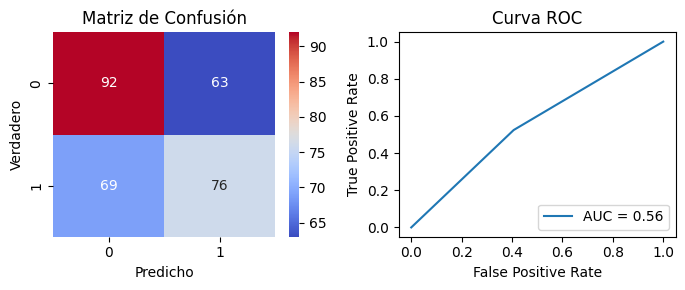


PRECISION: 57% = mujeres, 55%=varones. Tengo una mejor precision al predecir mujeres que hombres y una precision superior al baggin
RECALL: mujer = 59%, varon=52%. El modelo es mejor prediciendo las predicciones reales de mujeres y superor al bagging
F1-SCORE: mujer=58%, hombre=54%. Muestra un posible equilibrio, pero da preferencia a las mujeres y superior al bagging
ACCURACY: De los 300 datos que se tomo, el modelo tiene un 56% de precision, superior al bagging
MATRIZ DE CONFUSION: El modelo tiene un número considerable de falsos negativos y falsos positivos
                     lo que puede indicar que no discrimina bien entre las dos clases.
CURVA ROC: 
AUC: 0.56. El modelo tiene un rendimiento apenas superior al de un modelo aleatorio, cuyo AUC sería 0.5.
     Esto indica que el modelo no es buena en la clasificacion, necesita mejoraas

CONCLUSIONES: El modelo random forest, no parece tener buen rendimiento pero si superior a los 3 modelos evaluados
                Tiene un accur

In [ ]:
#RANDOM
reporte_random = classification_report(y_test, random_pred)
matrix_random = confusion_matrix(y_test, random_pred)
fpr, tpr, thresholds = roc_curve(y_test, random_pred) # Cálculo de las métricas False Positve Rate (fpr) y True Positive Rate (tpr)
roc_auc_random = auc(fpr, tpr) # Cálculo del área bajo la curva
print('\nMETRICAS DEL MODELO RANDOM-FOREST')
print('Informe de clasifiacion')
print(reporte_random)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matrix_random, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_random)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()
print('\nPRECISION: 57% = mujeres, 55%=varones. Tengo una mejor precision al predecir mujeres que hombres y una precision superior al baggin')
print('RECALL: mujer = 59%, varon=52%. El modelo es mejor prediciendo las predicciones reales de mujeres y superor al bagging')
print('F1-SCORE: mujer=58%, hombre=54%. Muestra un posible equilibrio, pero da preferencia a las mujeres y superior al bagging')
print('ACCURACY: De los 300 datos que se tomo, el modelo tiene un 56% de precision, superior al bagging')
print('MATRIZ DE CONFUSION: El modelo tiene un número considerable de falsos negativos y falsos positivos')
print('                     lo que puede indicar que no discrimina bien entre las dos clases.')
print('CURVA ROC: ')
print('AUC: 0.56. El modelo tiene un rendimiento apenas superior al de un modelo aleatorio, cuyo AUC sería 0.5.')
print('     Esto indica que el modelo no es buena en la clasificacion, necesita mejoraas')
print('\nCONCLUSIONES: El modelo random forest, no parece tener buen rendimiento pero si superior a los 3 modelos evaluados')
print('                Tiene un accuracy de apenas 56% y un AUC de 56% , quiere decir que apenas son mejore que un modelo aleatorio, pero mejores que los 3 modelos evaluados')
print('                La matriz muestra un numero elevado de falsos negativos y positivos')
print('                El modelo no esta separando correctamente, pero es mejor que se tiene')

ARBOL DE DESICION

---




METRICAS DEL MODELO ARBOL DE DECISION
Informe de clasifiacion
              precision    recall  f1-score   support

           0       0.51      0.46      0.48       155
           1       0.47      0.52      0.50       145

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300



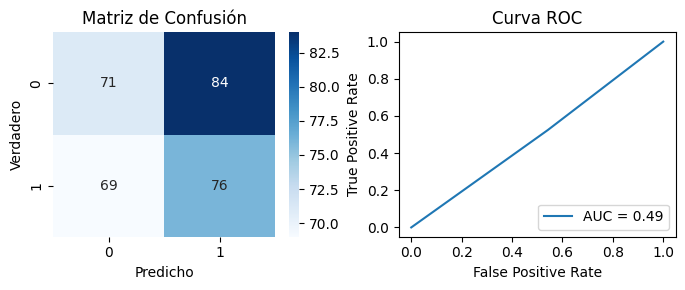


PRECISION: 52% = mujeres, 50%=varones. Tengo una mejor precision al predecir mujeres que hombres, el modelo mas bajo en este rango
RECALL: mujer = 50%, varon=51%. El modelo es mejor prediciendo las predicciones reales de hombres
F1-SCORE: mujer=51%, hombre=50%. Muestra un posible equilibrio, pero da preferencia a las mujeres
ACCURACY: De l0s 300 datos que se tomo, el modelo tiene un 50% de precision el modelo mas bajo en este rango
MATRIZ DE CONFUSION: El modelo tiene mas  falsos negativos y  bastantes falsos positivos el modelo mas bajo en este rango
                     lo que puede indicar que de los 3 comparados es el que peor discrimina.
CURVA ROC: 
AUC: El modelo no tiene un rendimiento superior al de un modelo aleatorio, cuyo AUC sería 0.5.
     Esto indica que el modelo no es buena en la clasificacion

CONCLUSIONES: El modelo arbol de decision, no parece tener buen rendimiento
                Tiene un accuracy de apenas 50% y un AUC de 50% , quiere decir que ni siquiera supera

In [ ]:
#ARBOL

reporte_arbol = classification_report(y_test, arbol_pred)
matrix_arbol = confusion_matrix(y_test, arbol_pred)
fpr, tpr, thresholds = roc_curve(y_test, arbol_pred) # Cálculo de las métricas False Positve Rate (fpr) y True Positive Rate (tpr)
roc_auc_arbol = auc(fpr, tpr) # Cálculo del área bajo la curva
print('\nMETRICAS DEL MODELO ARBOL DE DECISION')
print('Informe de clasifiacion')
print(reporte_arbol)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matrix_arbol, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_arbol)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()
print('\nPRECISION: 52% = mujeres, 50%=varones. Tengo una mejor precision al predecir mujeres que hombres, el modelo mas bajo en este rango')
print('RECALL: mujer = 50%, varon=51%. El modelo es mejor prediciendo las predicciones reales de hombres')
print('F1-SCORE: mujer=51%, hombre=50%. Muestra un posible equilibrio, pero da preferencia a las mujeres')
print('ACCURACY: De l0s 300 datos que se tomo, el modelo tiene un 50% de precision el modelo mas bajo en este rango')
print('MATRIZ DE CONFUSION: El modelo tiene mas  falsos negativos y  bastantes falsos positivos el modelo mas bajo en este rango')
print('                     lo que puede indicar que de los 3 comparados es el que peor discrimina.')
print('CURVA ROC: ')
print('AUC: El modelo no tiene un rendimiento superior al de un modelo aleatorio, cuyo AUC sería 0.5.')
print('     Esto indica que el modelo no es buena en la clasificacion')
print('\nCONCLUSIONES: El modelo arbol de decision, no parece tener buen rendimiento')
print('                Tiene un accuracy de apenas 50% y un AUC de 50% , quiere decir que ni siquiera superan un modelo aleatorio')
print('                La matriz muestra un numero elevado de falsos negativos y positivos')
print('                El modelo no esta separando correctamente')

# **CONCLUSION**

DESPUES DE LA INVESTIGACION REALIZADA Y EVALUAR LOS 3 MODELOS RECOMENDADOS POR LAZYPREDICT, ANALIZANDO SUS METRICAS, SUGIERO QUE EL MAS INDICADO ES EL RANDOM FOREST:

    -El modelo random forest, no parece tener buen rendimiento pero si
     superior a los 3 modelos evaluados')
    -Tiene un accuracy de apenas 56% y un AUC de 56% , quiere decir que
     apenas son mejore que un modelo aleatorio, pero mejores que los 3 modelos evaluados')
    -La matriz muestra un numero elevado de falsos negativos y    positivos')
    -El modelo no esta separando correctamente, pero es mejor que se tiene')